We Will be implementing Regression using Neural Network , i.e Predicting values of dependent variable using independent input features

In [4]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt

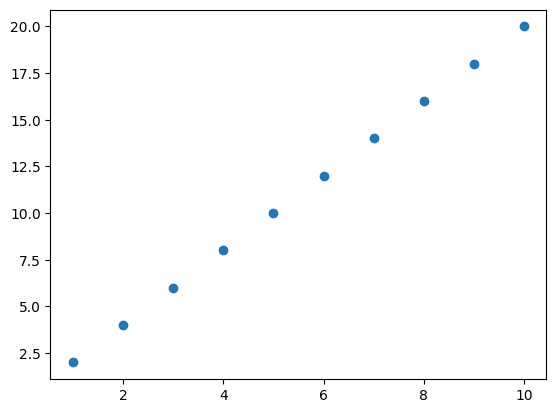

In [6]:
# Basic Regression Formulation using Numpy

a = np.array([1,2,3,4,5,6,7,8,9,10])
b= np.array([2,4,6,8,10,12,14,16,18,20])

# (y = 2x)
# For accessing we use x[0].ndim we gwt no dimensions as it is an array of scalar values and no dimensions
plt.scatter(a,b)
plt.show()

In [7]:
# Using Tensorflow or tensors

House_features = tf.constant(["Bedrooms","Bathrooms","Area"])
Price = tf.constant([74000])

print(House_features,Price)
print(f"Input Features Shape : {House_features.shape}")
print(f"Output Shape : {Price.shape}")

tf.Tensor([b'Bedrooms' b'Bathrooms' b'Area'], shape=(3,), dtype=string) tf.Tensor([74000], shape=(1,), dtype=int32)
Input Features Shape : (3,)
Output Shape : (1,)


# Converting numpy arrays to tensors

---



In [8]:
X = tf.constant(a)
y = tf.constant(b)

In [9]:
print(X,y)
print(f"Shape of X : {X.shape},  y : {y.shape}")
#But it is a regression probelm so we need X[] scalar value to predict a scalar value y[] respectively
print(X[1].shape) # void means 0 dimensions or scalar value

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10], shape=(10,), dtype=int64) tf.Tensor([ 2  4  6  8 10 12 14 16 18 20], shape=(10,), dtype=int64)
Shape of X : (10,),  y : (10,)
()


### Steps for modelling a neural network

* Make the data into proper format after preprocessing and EDA
* One can also pick a model prebuilt or formulate through scratch using the steps (1) below

1. Create a model : Define input output and hidden layers
2. Compile the model : Define loss function and a optimizer function and evaluation matrix
3. Fitting a model : Letting our model try to generalize the predictions using X,y from training set
4. Evaluate the model : Evaluate on the testing dataset
5. Improve through Experimentation
6. Save and load the finetuned model

# Note :

This happens because model.fit() no longer automatically upscales inputs from shape (batch_size, ) to (batch_size, 1).

This results in a shape error (remember one of most common errors in deep learning is input and output shapes).

In [10]:
tf.random.set_seed(78)

# Defining the model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)# will throw error as it requires minimum 2 dimensional X and for our example we have 1 dimensional X

])

# Compiling
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fitting the model
# model.fit(X,y,epochs=5) # will throw error
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 524ms/step - loss: 7.2015 - mae: 7.2015
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 6.8890 - mae: 6.8890
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 6.5765 - mae: 6.5765
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 6.2640 - mae: 6.2640
Epoch 5/5
1/1 [==============================] - 0s 18ms/step - loss: 5.9515 - mae: 5.9515


In [11]:
y_pred = model.predict([12])

1/1 [==============================] - 0s 110ms/step


In [12]:
print(y_pred) # as mae us 5.192 we can say that y lies
print(y_pred-5.192,"<y<",y_pred+5.192)
#Which is still off thus we need to train more and tune the hyperparameters

[[11.637642]]
[[6.445642]] <y< [[16.829641]]


# Improving the model

Can be done by updating or altering the steps taken while creating a model

1. **Adding Layers to Model** : we can also change the number of neurons per layer , the activation function can also be altered to get the desired results

2. **Compiling The Model** : here we might change the optimization function or its learning rate

3. **Fitting The Model** We might fit the model with more iteration or epochs

# Lets try optimizing our last model

M1 )=> Increasing the epochs

In [13]:
# Defining the model
mod1= tf.keras.Sequential([
    tf.keras.layers.Dense(1)# will throw error as it requires minimum 2 dimensional X and for our example we have 1 dimensional X

])

# Compiling
mod1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fitting the model
# model.fit(X,y,epochs=5) # will throw error
mod1.fit(tf.expand_dims(X,axis=-1),y,epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 384ms/step - loss: 15.2826 - mae: 15.2826
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 14.9701 - mae: 14.9701
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 14.6576 - mae: 14.6576
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 14.3451 - mae: 14.3451
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 14.0326 - mae: 14.0326
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 13.7201 - mae: 13.7201
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 13.4076 - mae: 13.4076
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 13.0951 - mae: 13.0951
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 12.7826 - mae: 12.7826
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 12.4701 - mae: 12.4701
Epoch 11/100
1/1 [==============================

In [14]:
y_pred = mod1.predict([12])
print(f"predicted:{y_pred} \nactual :{12*2}") # which is very close
print(y_pred-0.2786,"<y<",y_pred+0.2786)

1/1 [==============================] - 0s 83ms/step
predicted:[[23.784115]] 
actual :24
[[23.505514]] <y< [[24.062716]]


2. mod2)=> We will add a layer and change the oprtimization function

In [15]:
mod2 =  tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])
mod2.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(lr=0.1199),
             metrics = ["mae"])
mod2.fit(tf.expand_dims(X,axis = -1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 640ms/step - loss: 10.7529 - mae: 10.7529
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6642 - mae: 10.6642
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5756 - mae: 10.5756
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.4869 - mae: 10.4869
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.3981 - mae: 10.3981
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 10.3093 - mae: 10.3093
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.2205 - mae: 10.2205
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 10.1317 - mae: 10.1317
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 10.0428 - mae: 10.0428
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 9.9538 - mae: 9.9538
Epoch 11/100
1/1 [==============================] 

In [16]:
y_pred = mod2.predict([12])
print(f"predicted:{y_pred} \nactual :{12*2}") # which is very close comparatively to the base model
print(y_pred-0.8084,"<y<",y_pred+0.8084)

1/1 [==============================] - 0s 74ms/step
predicted:[[21.870678]] 
actual :24
[[21.062279]] <y< [[22.679077]]


# Evaluating the model (flow)
```We basically have to "visualize visualize visualize" ```

1. One can visualize the data working upon
2. One can visualize the model which is built
3. One can visualize the accuracy of the predictions based on suitable metrics


# Lets Conider a non linear regression problem where suppose

# We need to predict the radiation levels faced by pilots and astraunots that can be used for predicting the risks of cancer


* sample_x : Be the altitidued in (Thousand feets)
* sample_y : Radiation levels

In [17]:
sample_X = tf.range(0,300,3)
print(sample_X)

tf.Tensor(
[  0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51
  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 102 105
 108 111 114 117 120 123 126 129 132 135 138 141 144 147 150 153 156 159
 162 165 168 171 174 177 180 183 186 189 192 195 198 201 204 207 210 213
 216 219 222 225 228 231 234 237 240 243 246 249 252 255 258 261 264 267
 270 273 276 279 282 285 288 291 294 297], shape=(100,), dtype=int32)


In [18]:
sample_y= +25 - (3*sample_X) + (tf.math.square(sample_X))
print(sample_y)

tf.Tensor(
[   25    25    43    79   133   205   295   403   529   673   835  1015
  1213  1429  1663  1915  2185  2473  2779  3103  3445  3805  4183  4579
  4993  5425  5875  6343  6829  7333  7855  8395  8953  9529 10123 10735
 11365 12013 12679 13363 14065 14785 15523 16279 17053 17845 18655 19483
 20329 21193 22075 22975 23893 24829 25783 26755 27745 28753 29779 30823
 31885 32965 34063 35179 36313 37465 38635 39823 41029 42253 43495 44755
 46033 47329 48643 49975 51325 52693 54079 55483 56905 58345 59803 61279
 62773 64285 65815 67363 68929 70513 72115 73735 75373 77029 78703 80395
 82105 83833 85579 87343], shape=(100,), dtype=int32)


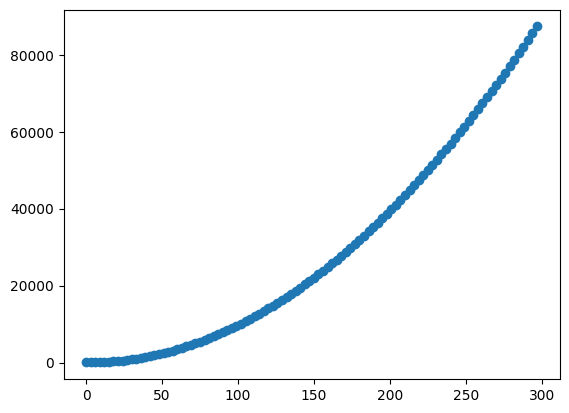

In [19]:
plt.scatter(sample_X,sample_y)

Splitting the data into train and test

In [20]:
X_train = sample_X[:70]
X_test = sample_X[70:]
y_train = sample_y[:70]
y_test = sample_y[70:]
print(f"{X_train}\n{X_test}\n\n")
print(f"{y_train}\n{y_test}")

[  0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51
  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 102 105
 108 111 114 117 120 123 126 129 132 135 138 141 144 147 150 153 156 159
 162 165 168 171 174 177 180 183 186 189 192 195 198 201 204 207]
[210 213 216 219 222 225 228 231 234 237 240 243 246 249 252 255 258 261
 264 267 270 273 276 279 282 285 288 291 294 297]


[   25    25    43    79   133   205   295   403   529   673   835  1015
  1213  1429  1663  1915  2185  2473  2779  3103  3445  3805  4183  4579
  4993  5425  5875  6343  6829  7333  7855  8395  8953  9529 10123 10735
 11365 12013 12679 13363 14065 14785 15523 16279 17053 17845 18655 19483
 20329 21193 22075 22975 23893 24829 25783 26755 27745 28753 29779 30823
 31885 32965 34063 35179 36313 37465 38635 39823 41029 42253]
[43495 44755 46033 47329 48643 49975 51325 52693 54079 55483 56905 58345
 59803 61279 62773 64285 65815 67363 68929 70513 72115 73735 75373 77029
 78703 80395 8210

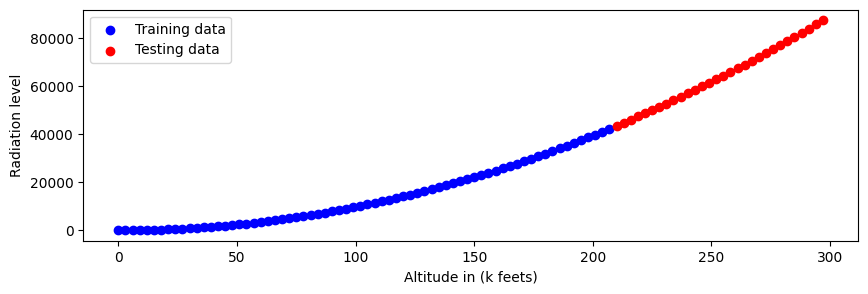

In [21]:
plt.figure(figsize = (10,3))
plt.scatter(X_train,y_train,c='b',label = "Training data")
plt.scatter(X_test,y_test,c='r',label = "Testing data")
plt.legend()
plt.xlabel("Altitude in (k feets)")
plt.ylabel("Radiation level");


In [22]:
# Crating a model
# Names are optional and are used for better visualization of structure below
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu",name='input_layer'), # softmax does not work here
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(1,name='output_layer')
],name = 'NonLinear')
model.compile(loss = tf.keras.losses.mae,
              # optimizer = tf.keras.optimizers.SGD(),
              optimizer = tf.keras.optimizers.Adam(lr=300),
              metrics = ['mae'])
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=1000)

Epoch 1/1000
3/3 [==============================] - 1s 6ms/step - loss: 14097.3037 - mae: 14097.3037
Epoch 2/1000
3/3 [==============================] - 0s 5ms/step - loss: 14081.0098 - mae: 14081.0098
Epoch 3/1000
3/3 [==============================] - 0s 7ms/step - loss: 14055.1514 - mae: 14055.1514
Epoch 4/1000
3/3 [==============================] - 0s 8ms/step - loss: 14016.1621 - mae: 14016.1621
Epoch 5/1000
3/3 [==============================] - 0s 7ms/step - loss: 13949.7451 - mae: 13949.7451
Epoch 6/1000
3/3 [==============================] - 0s 7ms/step - loss: 13851.0586 - mae: 13851.0586
Epoch 7/1000
3/3 [==============================] - 0s 6ms/step - loss: 13691.3643 - mae: 13691.3643
Epoch 8/1000
3/3 [==============================] - 0s 5ms/step - loss: 13450.1328 - mae: 13450.1328
Epoch 9/1000
3/3 [==============================] - 0s 7ms/step - loss: 13095.0996 - mae: 13095.0996
Epoch 10/1000
3/3 [==============================] - 0s 10ms/step - loss: 12569.4971 - mae:

In [23]:
model.summary() # we get it after building either by model.build() or model.fit()


Model: "NonLinear"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 200)               20200     
                                                                 
 output_layer (Dense)        (None, 1)                 201       
                                                                 
Total params: 50901 (198.83 KB)
Trainable params: 50901 (

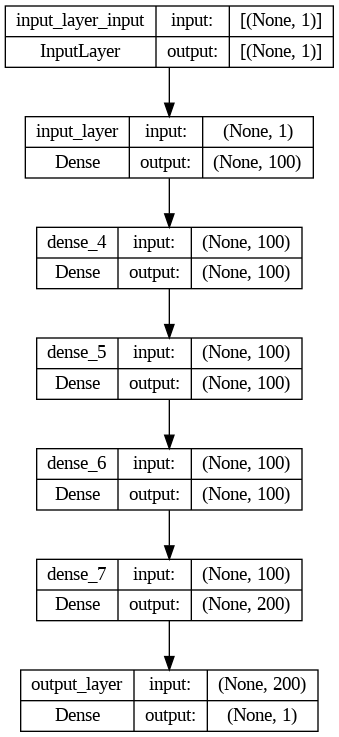

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)
# plot_model(model=model,show_shapes=True,to_file='model.png')

# Visualizing models predictions

In [25]:
 # We want to visualize the predictions against the truth tables
 y_pred = model.predict(X_test)
 print(y_pred)

1/1 [==============================] - 0s 133ms/step
[[42095.78 ]
 [43063.348]
 [44030.91 ]
 [44998.47 ]
 [45966.035]
 [46925.06 ]
 [47880.19 ]
 [48835.324]
 [49790.457]
 [50745.59 ]
 [51700.723]
 [52655.863]
 [53610.99 ]
 [54566.125]
 [55521.258]
 [56476.395]
 [57431.527]
 [58386.668]
 [59349.758]
 [60318.2  ]
 [61285.098]
 [62251.06 ]
 [63217.02 ]
 [64182.973]
 [65148.93 ]
 [66114.88 ]
 [67080.84 ]
 [68046.8  ]
 [69012.75 ]
 [69978.7  ]]


In [26]:
def visualize(X_test,X_train,y_test,y_train,y_pred,model):
  yt_pred = model.predict(X_train)
  plt.figure(figsize=(20,8))
  plt.scatter(X_train,y_train,c='b',label='Training Data')
  plt.scatter(X_train,yt_pred,c='cyan',label='Predicted Values On Seen')
  plt.scatter(X_test,y_test,c='g',label='Actual Values')
  plt.scatter(X_test,y_pred,c='r',label='Predicted Values On Unseen')
  plt.xlabel("Altitude in (k feets)")
  plt.ylabel("Radiation level");
  plt.legend();

3/3 [==============================] - 0s 6ms/step


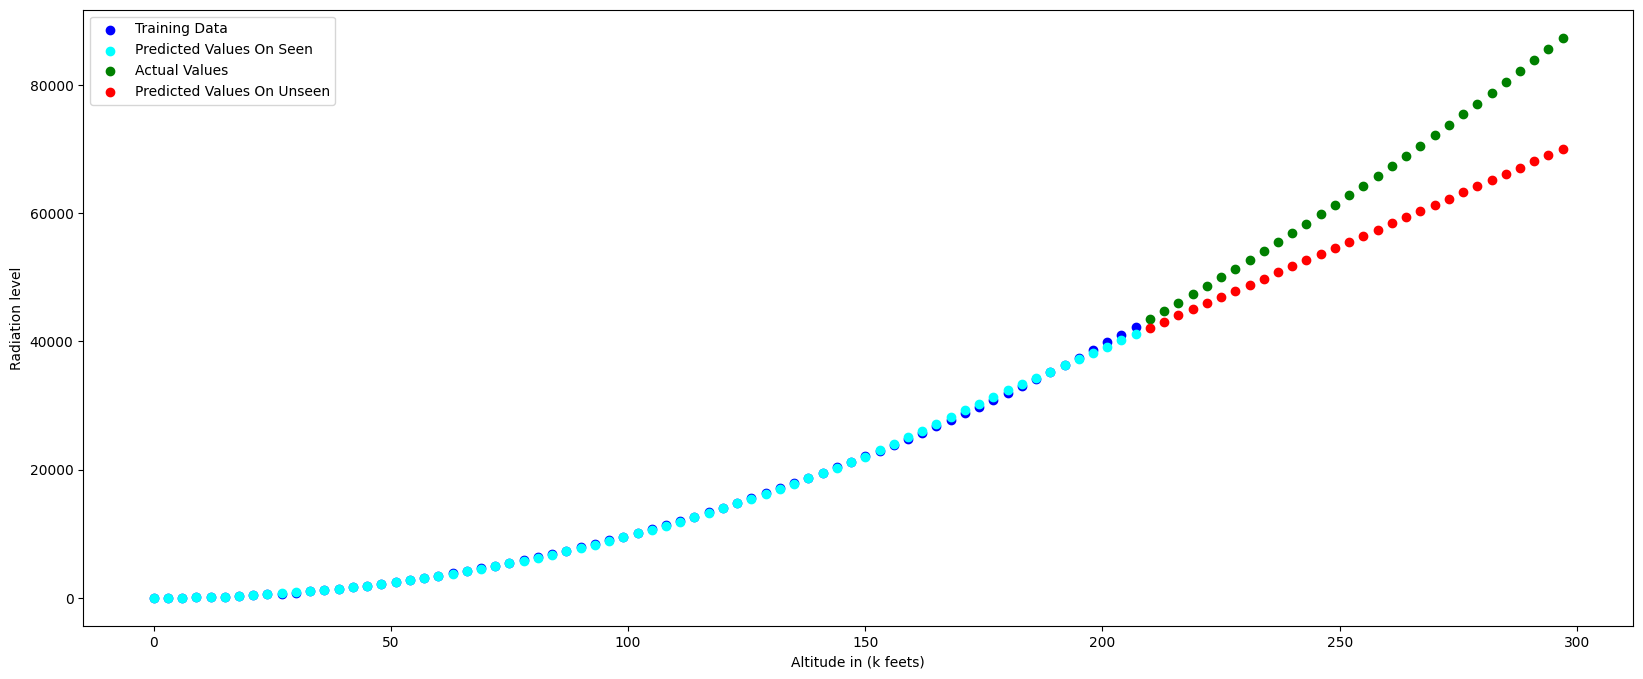

In [27]:
visualize(X_test,X_train,y_test,y_train,y_pred,model)

# Evaluating the model using various metrics

Their are various metrics that can be used for regression preoblems , here we will use
* MAE
* MSE
* Huber

In [28]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 355ms/step - loss: 8178.7432 - mae: 8178.7432


[8178.7431640625, 8178.7431640625]

In [42]:
#  mae = tf.metrics.mean_absolute_error(y_true = y_test, # gives wrong output as the shapes of pred and test are diffrent
#                                       y_pred = y_pred)

print(y_test.shape,y_pred.shape)
# so we will use squeeze methhod
def mae(y_test,y_pred) :
  mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                        y_pred = tf.squeeze(y_pred))
  print(mae) # same correct output as evaluate function
  return(mae)
def mse(y_test,y_pred) :
  mse = tf.metrics.mean_squared_error(y_true = y_test,
                                        y_pred = tf.squeeze(y_pred))
  print(mse)
  return(mse)

def huber(y_test,y_pred) :
  huber = tf.keras.losses.huber(y_true = y_test,
                                        y_pred = tf.squeeze(y_pred))
  print(huber)
  return(huber)

mae_1 = mae(y_test,y_pred)
mse_1 = mse(y_test,y_pred)
hub_1 = huber(y_test,y_pred)

(30,) (30, 1)
tf.Tensor(8178.7427, shape=(), dtype=float32)
tf.Tensor(90058650.0, shape=(), dtype=float32)
tf.Tensor(8178.2427, shape=(), dtype=float32)


# Experimenting models

1. **mod1** : 6 layers , 1000 epochs (Baseline already trained above)
2. **mod2** : 10 layers ,1000 epochs
3. **mod3** : 15 layers , 1500 epochs

In [30]:
# Crating a model
# Names are optional and are used for better visualization of structure below
mod2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu",name='input_layer'), # softmax does not work here
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(1,name='output_layer')
],name = 'NonLinear')
mod2.compile(loss = tf.keras.losses.mae,
              # optimizer = tf.keras.optimizers.SGD(),
              optimizer = tf.keras.optimizers.Adam(lr=300),
              metrics = ['mae'])
mod2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=1000)

Epoch 1/1000
3/3 [==============================] - 4s 13ms/step - loss: 14098.3770 - mae: 14098.3770
Epoch 2/1000
3/3 [==============================] - 0s 8ms/step - loss: 14085.7197 - mae: 14085.7197
Epoch 3/1000
3/3 [==============================] - 0s 9ms/step - loss: 14044.8037 - mae: 14044.8037
Epoch 4/1000
3/3 [==============================] - 0s 8ms/step - loss: 13941.7471 - mae: 13941.7471
Epoch 5/1000
3/3 [==============================] - 0s 10ms/step - loss: 13655.5410 - mae: 13655.5410
Epoch 6/1000
3/3 [==============================] - 0s 9ms/step - loss: 12998.2705 - mae: 12998.2705
Epoch 7/1000
3/3 [==============================] - 0s 11ms/step - loss: 11365.3955 - mae: 11365.3955
Epoch 8/1000
3/3 [==============================] - 0s 12ms/step - loss: 7954.8579 - mae: 7954.8579
Epoch 9/1000
3/3 [==============================] - 0s 10ms/step - loss: 4728.5029 - mae: 4728.5029
Epoch 10/1000
3/3 [==============================] - 0s 10ms/step - loss: 5954.1270 - mae:

Model: "NonLinear"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 200)               20200     
                                                                 
 dense_12 (Dense)            (None, 100)               20100     
                                                                 
 dense_13 (Dense)            (None, 100)               10

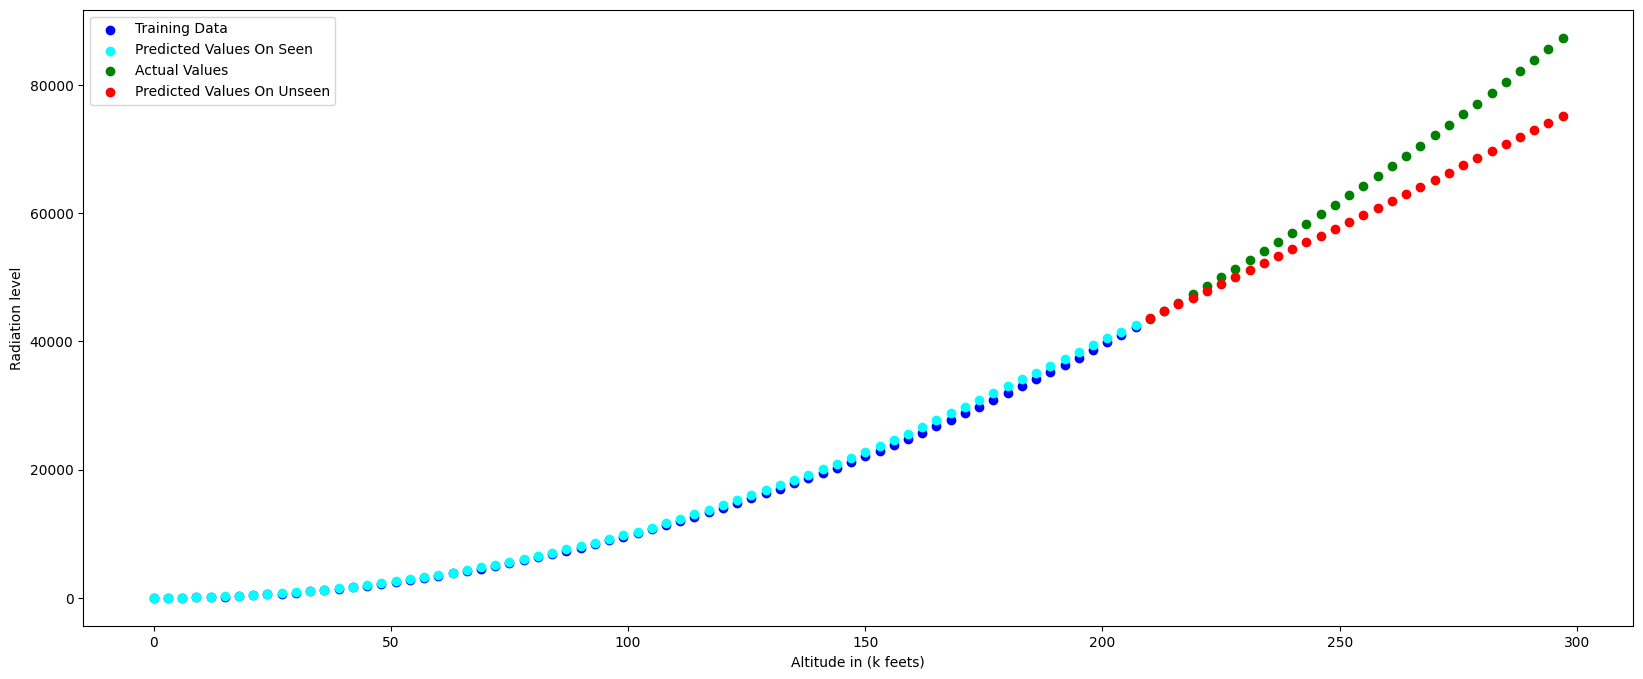

In [43]:
print(mod2.summary())
y_pred_2 = mod2.predict(X_test)
visualize(X_test,X_train,y_test,y_train,y_pred_2,mod2)
mae_2 = mae(y_test,y_pred_2)
mse_2 = mse(y_test,y_pred_2)
hub_2 = huber(y_test,y_pred_2)

In [32]:
# Crating a model
# Names are optional and are used for better visualization of structure below
mod3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu",name='input_layer'), # softmax does not work here
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(1,name='output_layer')
],name = 'NonLinear')
mod3.compile(loss = tf.keras.losses.mae,
              # optimizer = tf.keras.optimizers.SGD(),
              optimizer = tf.keras.optimizers.Adam(lr=300),
              metrics = ['mae'])
mod3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=1500)

Epoch 1/1500
3/3 [==============================] - 5s 12ms/step - loss: 14100.7969 - mae: 14100.7969
Epoch 2/1500
3/3 [==============================] - 0s 11ms/step - loss: 14097.7422 - mae: 14097.7422
Epoch 3/1500
3/3 [==============================] - 0s 15ms/step - loss: 14078.2510 - mae: 14078.2510
Epoch 4/1500
3/3 [==============================] - 0s 13ms/step - loss: 13996.2666 - mae: 13996.2666
Epoch 5/1500
3/3 [==============================] - 0s 10ms/step - loss: 13635.7598 - mae: 13635.7598
Epoch 6/1500
3/3 [==============================] - 0s 11ms/step - loss: 12374.0020 - mae: 12374.0020
Epoch 7/1500
3/3 [==============================] - 0s 13ms/step - loss: 7804.8462 - mae: 7804.8462
Epoch 8/1500
3/3 [==============================] - 0s 10ms/step - loss: 5359.3115 - mae: 5359.3115
Epoch 9/1500
3/3 [==============================] - 0s 17ms/step - loss: 4342.4448 - mae: 4342.4448
Epoch 10/1500
3/3 [==============================] - 0s 12ms/step - loss: 4611.2744 - ma

Model: "NonLinear"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 200)               20200     
                                                                 
 dense_21 (Dense)            (None, 100)               20100     
                                                                 
 dense_22 (Dense)            (None, 100)               10

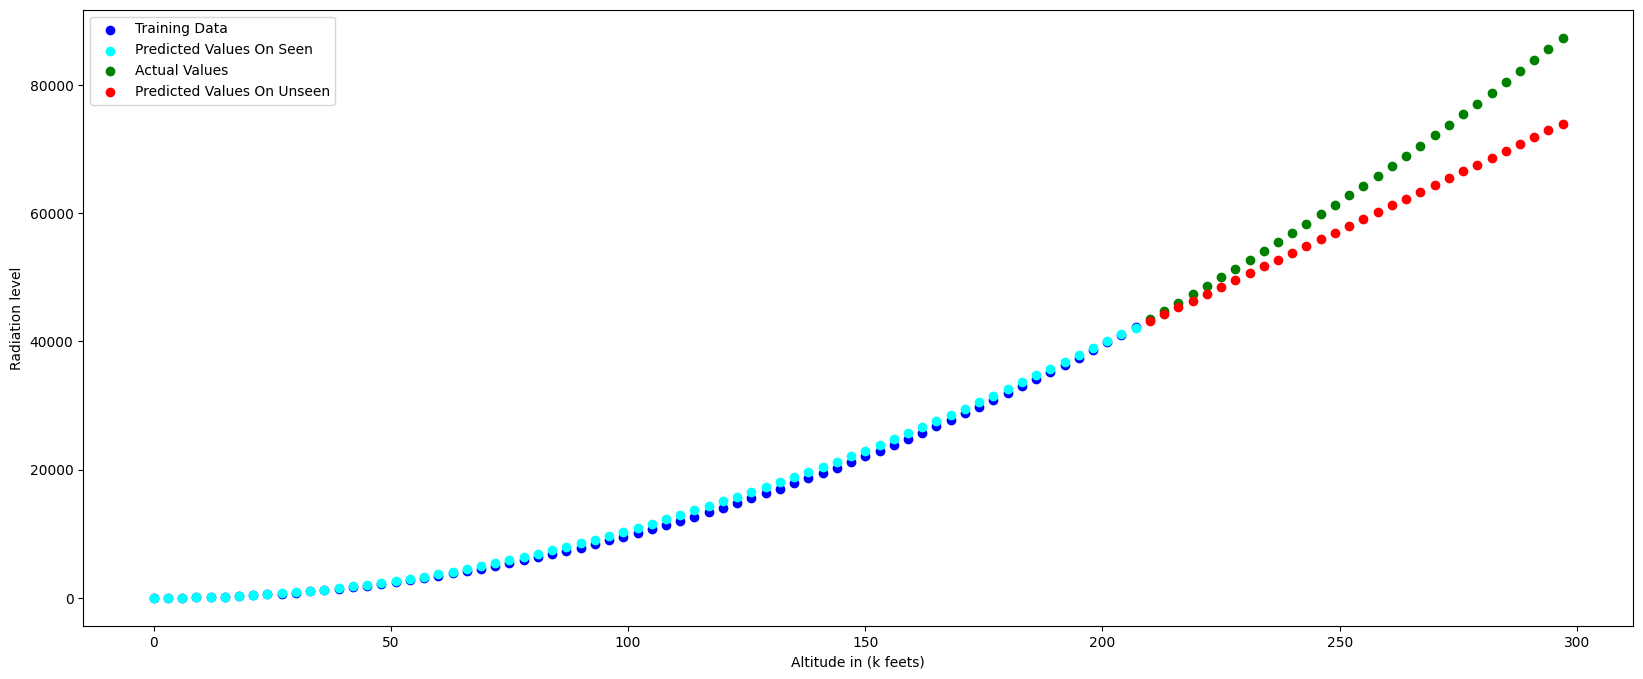

In [44]:
print(mod3.summary())
y_pred_3 = mod3.predict(X_test)
visualize(X_test,X_train,y_test,y_train,y_pred_3,mod3)
mae_3 = mae(y_test,y_pred_3)
mse_3 = mse(y_test,y_pred_3)
hub_3 = huber(y_test,y_pred_3)

In [51]:
results = [["Model 1",mae_1.numpy(),mse_1.numpy()],
           ["Model 2",mae_2.numpy(),mse_2.numpy()],
            ["Model 3",mae_3.numpy(),mse_3.numpy()]]
import pandas as pd
df = pd.DataFrame(results,columns=["model","mae","mse"])
df

,model,mae,mse
0,Model 1,8178.742676,90058648.0
1,Model 2,4931.881348,37990904.0
2,Model 3,5638.183105,47412200.0


# Note :
Main goal is to reduce the time between expirminetation so we have to use smaller set for experimenting and keep on doing until we geta a satisfactory result

### Models can be saved using 2 methods as seen below

In [57]:
mod2.save("/content/drive/MyDrive/datasets/Saved_Model")# Creates a folder which has assets ,variables,and .pb file
mod2.save("/content/drive/MyDrive/datasets/Mymodel.h5") # HDF% file format

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [58]:
loaded = tf.keras.models.load_model("/content/drive/MyDrive/datasets/Saved_Model")
loaded.summary()

Model: "NonLinear"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 200)               20200     
                                                                 
 dense_12 (Dense)            (None, 100)               20100     
                                                                 
 dense_13 (Dense)            (None, 100)               10

In [59]:
loaded = tf.keras.models.load_model("/content/drive/MyDrive/datasets/Mymodel.h5")
loaded.summary()

Model: "NonLinear"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 200)               20200     
                                                                 
 dense_12 (Dense)            (None, 100)               20100     
                                                                 
 dense_13 (Dense)            (None, 100)               10